In [17]:
#https://tutorials.pytorch.kr/beginner/basics/quickstart_tutorial.html

In [18]:
import torch
import torchvision
import matplotlib
import matplotlib.pyplot

In [19]:
training_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
)

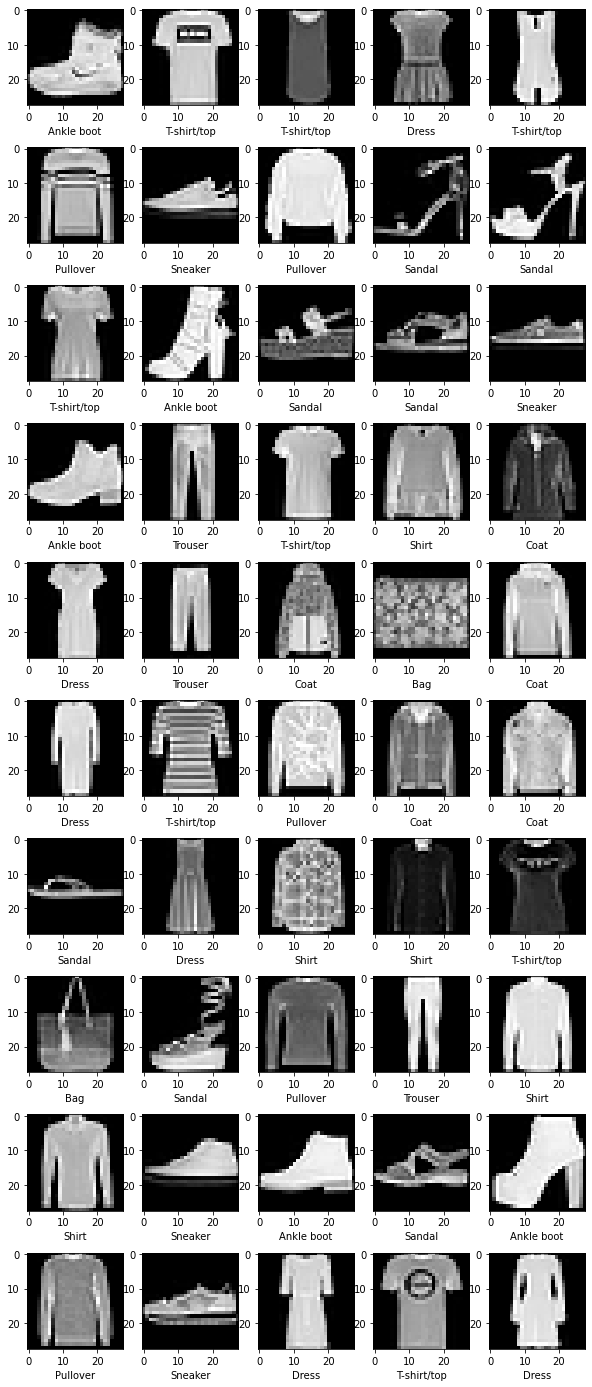

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

figure = matplotlib.pyplot.figure(figsize=(10, 25))
for i in range(50):
    img, label = training_data[i]
    matplotlib.pyplot.subplot(10, 5, i + 1)
    matplotlib.pyplot.imshow(img.squeeze(), cmap="gray")
    matplotlib.pyplot.xlabel(class_names[label])

In [21]:
batch_size = 64

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    img, label = test_data[0]
    print(X.shape, img.shape)
    print(y.shape, label)
    # torch.uilts.data.DatadeLoader로 input들을 batch size만큼 묶어서 봄
    # 참고 https://losskatsu.github.io/machine-learning/epoch-batch/#1-%EC%82%AC%EC%A0%84%EC%A0%81-%EC%9D%98%EB%AF%B8
    break


torch.Size([64, 1, 28, 28]) torch.Size([1, 28, 28])
torch.Size([64]) 9


In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [25]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.linear_relu_stack = torch.nn.Sequential(
            torch.nn.Linear(28*28, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 512),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [26]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)


In [27]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        # zero_grad https://velog.io/@kjb0531/zerograd%EC%9D%98-%EC%9D%B4%ED%95%B4

        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [28]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [30]:
epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.145496  [    0/60000]
loss: 1.150107  [ 6400/60000]
loss: 0.970963  [12800/60000]
loss: 1.098588  [19200/60000]
loss: 0.984543  [25600/60000]
loss: 1.012767  [32000/60000]
loss: 1.042406  [38400/60000]
loss: 0.979274  [44800/60000]
loss: 1.026232  [51200/60000]
loss: 0.960755  [57600/60000]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.964589 

Epoch 2
-------------------------------
loss: 1.029001  [    0/60000]
loss: 1.055924  [ 6400/60000]
loss: 0.859298  [12800/60000]
loss: 1.008835  [19200/60000]
loss: 0.896997  [25600/60000]
loss: 0.923822  [32000/60000]
loss: 0.965731  [38400/60000]
loss: 0.906368  [44800/60000]
loss: 0.948288  [51200/60000]
loss: 0.896342  [57600/60000]
Test Error: 
 Accuracy: 68.5%, Avg loss: 0.892798 

Epoch 3
-------------------------------
loss: 0.944010  [    0/60000]
loss: 0.991215  [ 6400/60000]
loss: 0.779350  [12800/60000]
loss: 0.945697  [19200/60000]
loss: 0.838354  [25600/60000]
loss: 0.859381  [32000/600